In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = load_diabetes()

In [3]:
X = data.data
y = data.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state = 42)
model.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [7]:
y_pred = model.predict(X_test)
y_pred

array([156.93667624, 153.85499641, 156.25311154, 170.0390646 ,
       154.20410061, 151.29267558, 164.36457367, 162.36547587,
       147.87178295, 152.0050782 , 148.10701212, 150.1612086 ,
       140.89769686, 162.19021155, 149.64857395, 150.30358138,
       163.42042993, 165.95926388, 153.55291324, 161.44407738,
       155.49967194, 148.3565114 , 144.66763207, 158.84620247,
       151.14739136, 155.57584224, 156.95808357, 156.42316443,
       140.55967682, 153.32870126, 156.26219583, 146.97812338,
       152.97922429, 158.25016391, 157.8100579 , 158.99899944,
       152.64769373, 154.17582367, 158.01720348, 142.98761795,
       146.4346493 , 150.38979538, 153.07159361, 157.75641623,
       155.6193107 , 143.91482236, 144.30506545, 145.40620148,
       142.30727519, 151.27585261, 148.47512651, 142.5846332 ,
       152.34684336, 148.22114829, 160.19552996, 150.07652623,
       149.26316217, 157.47005169, 147.71397177, 141.69324912,
       159.26311249, 155.0323287 , 150.3212881 , 151.15

In [14]:
coefficient = model.coef_
coefficient

array([ 1.08309211e+01, -9.51378929e-03,  3.89068647e+01,  2.87792332e+01,
        1.03720066e+01,  7.19189161e+00, -2.35109789e+01,  2.56271600e+01,
        3.50737451e+01,  2.40712511e+01])

In [9]:
model.intercept_

np.float64(153.50994400357047)

In [10]:
mean_squared_error(y_test, y_pred)

4775.466767154695

In [11]:
r2_score(y_test, y_pred)

0.09865421116113748

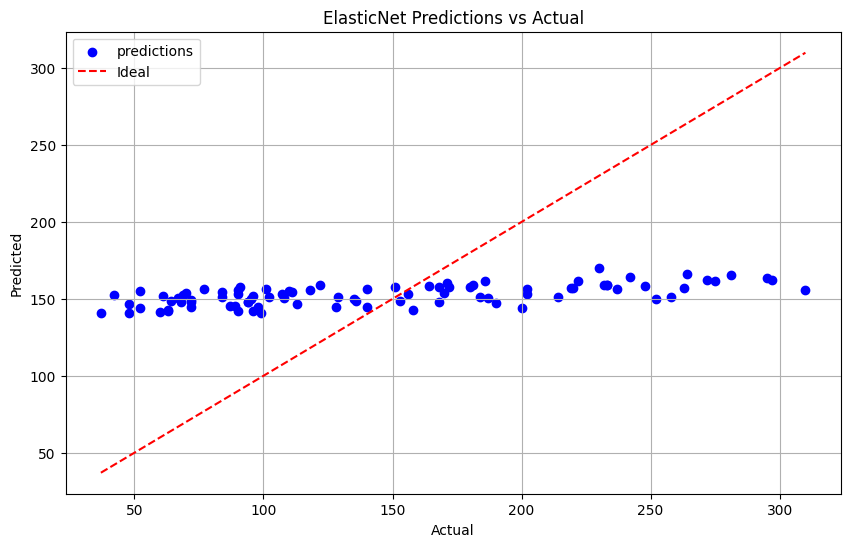

In [12]:
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred, color = 'blue', label = 'predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label = 'Ideal')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("ElasticNet Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
features = data.feature_names

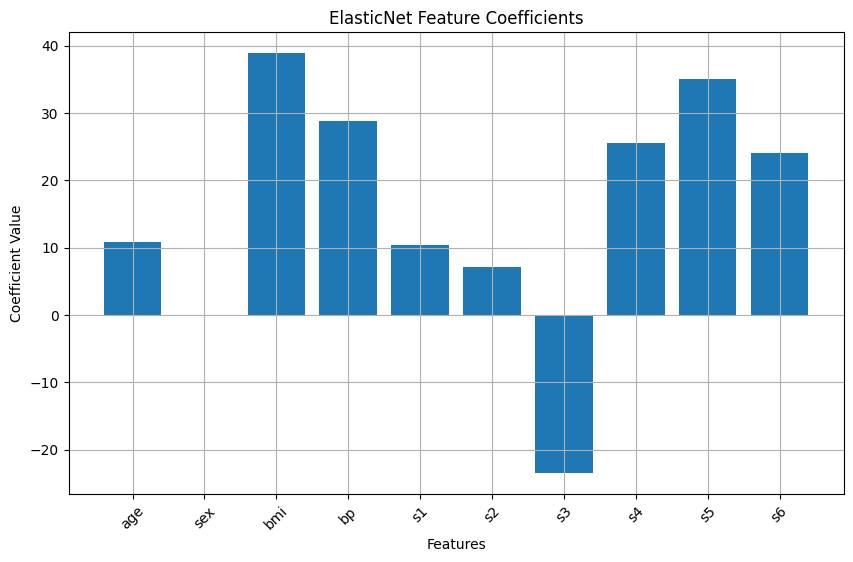

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(features, coefficient)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("ElasticNet Feature Coefficients")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()